In [3]:
import pandas as pd
df = pd.read_excel("Accounts.xlsx")
df

,Month,Order,Name,Number,Address,Price
0,January,strawberry mini\nvanilla mini\ncoffee mini,Dorin Yasmin,1731047414,"House 33, Road 10, Sector 09\nUttara",790
1,January,chocolate mini\nlavender mini,\nFariha Rysha,1973761808,"Chittagong Cantonment, bayzid, chittagong.",630
2,January,beli mini,anisa,1886005668,"sector 9,road 2 house 11 Uttara",310
3,January,vanilla mini,Tasnim Rahman Mahim,1768808972,Uttara dhakaSector 11 Road 14 House 95,310
4,January,chocolate mini,Nabela Akter,1614231665,"Pangsha upazila, Rajbari Zila",390
...,...,...,...,...,...,...
673,December,strawberry mini\npeppermin mini\njasmine mini,Samiya mehezabin,1778185591,Sirajganj sodor upazila office er pase hoshinp...,870
674,December,sandalwood mini\nbeli minii,Pranamita Mazumder,1889845278,"Mohazer para ukil colony \nCox's bazar,",630
675,December,vanilla mini,Syeda Anindita Tasneem,1825326491,"house 1015, road 17, baitul Aman housing, adab...",310
676,December,lavender mini,Arpita Abonti,1312626708,"H-20,Road-6,Sector-6,Uttara,Dhaka",310


In [5]:
df.isnull().sum()

Month                                                      0
 Order                                                     0
                   Name                                    0
Number                                                     0
                                                Address    0
        Price                                              9
dtype: int64

In [7]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].map(lambda x: x.strip() if isinstance(x, str) else x)
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df.reset_index(drop=True, inplace=True)
df.head()

,month,order,name,number,address,price
0,January,strawberry mini\nvanilla mini\ncoffee mini,Dorin Yasmin,1731047414,"House 33, Road 10, Sector 09\nUttara",790.0
1,January,chocolate mini\nlavender mini,Fariha Rysha,1973761808,"Chittagong Cantonment, bayzid, chittagong.",630.0
2,January,beli mini,anisa,1886005668,"sector 9,road 2 house 11 Uttara",310.0
3,January,vanilla mini,Tasnim Rahman Mahim,1768808972,Uttara dhakaSector 11 Road 14 House 95,310.0
4,January,chocolate mini,Nabela Akter,1614231665,"Pangsha upazila, Rajbari Zila",390.0


In [9]:
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)
monthly_revenue = df.groupby('month', observed=True)['price'].sum().reset_index()

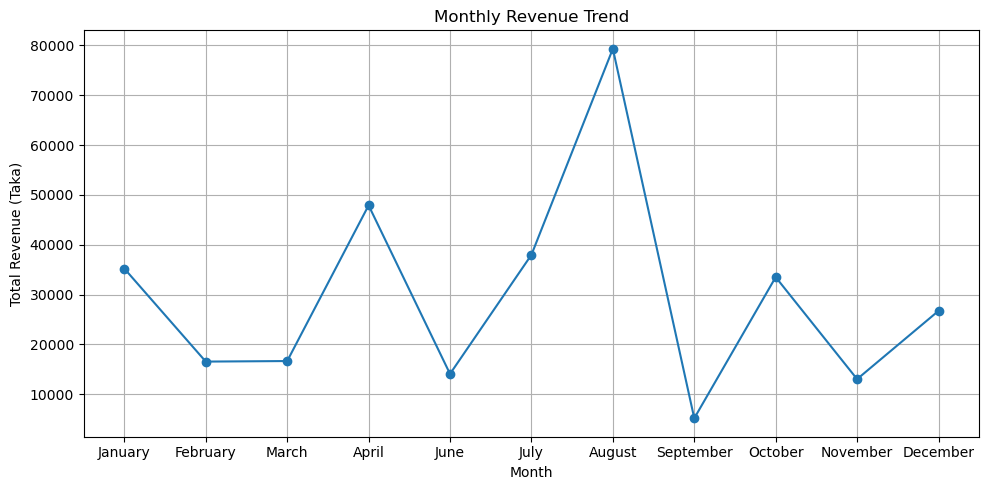

,month,price
0,January,35220.0
1,February,16560.0
2,March,16670.0
3,April,47910.0
4,June,14090.0
5,July,37990.0
6,August,79330.0
7,September,5190.0
8,October,33510.0
9,November,13040.0


In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(monthly_revenue['month'], monthly_revenue['price'], marker='o')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue (Taka)")
plt.grid(True)
plt.tight_layout()
plt.show()

monthly_revenue

In [13]:
all_orders = df['order'].str.split('\n').sum()
cleaned_orders = [item.strip().lower() for item in all_orders if item.strip()]

In [15]:
from collections import Counter
product_counts = Counter(cleaned_orders)
top_products = pd.DataFrame(product_counts.items(), columns=['product', 'count'])
top_products = top_products.sort_values(by='count', ascending=False).reset_index(drop=True)

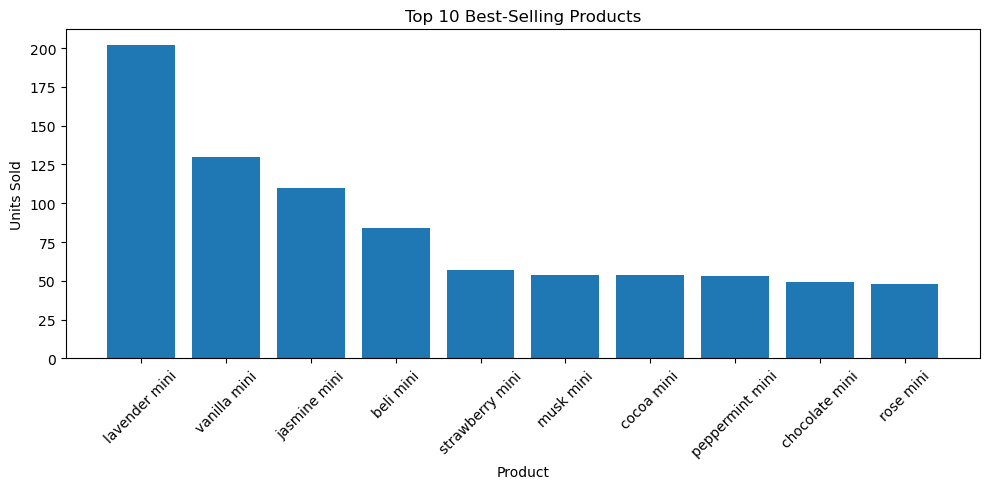

In [31]:
import matplotlib.pyplot as plt

# Plot a bar chart
plt.figure(figsize=(10, 5))
plt.bar(top_products['product'][:10], top_products['count'][:10])
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Product")
plt.ylabel("Units Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
total_revenue = df['price'].sum()
total_orders = len(df)

aov_per_order = total_revenue / total_orders
print(f"Average Order Value per Order: ৳{aov_per_order:.2f}")

Average Order Value per Order: ৳513.32


In [21]:
unique_customers = df['number'].nunique()
aov_per_customer = total_revenue / unique_customers
print(f"Average Order Value per Customer: ৳{aov_per_customer:.2f}")

Average Order Value per Customer: ৳547.22


In [25]:
top_customers = df.groupby('number')['price'].sum().reset_index()
top_customers = top_customers.sort_values(by='price', ascending=False).reset_index(drop=True)
names = df.groupby('number')['name'].first().reset_index()
top_customers = top_customers.merge(names, on='number')
top_customers.head(10)

,number,price,name
0,1686081246,8470.0,Alif Dipu
1,1817297375,3360.0,Nuna Nawar Hassan
2,1797515151,3060.0,Rozana Ali
3,1758696122,2940.0,Shahfinaz Amreen Basit
4,1321188759,2410.0,strawberry mini\nlavender mini
5,1558025556,2340.0,Labeeba
6,1886184860\n01701072610,2240.0,Dr Sushmita
7,1742255362,2160.0,Maisha Razzak
8,1718996028,2070.0,Fabiha Reha
9,1715275637,2000.0,Farhana Poly


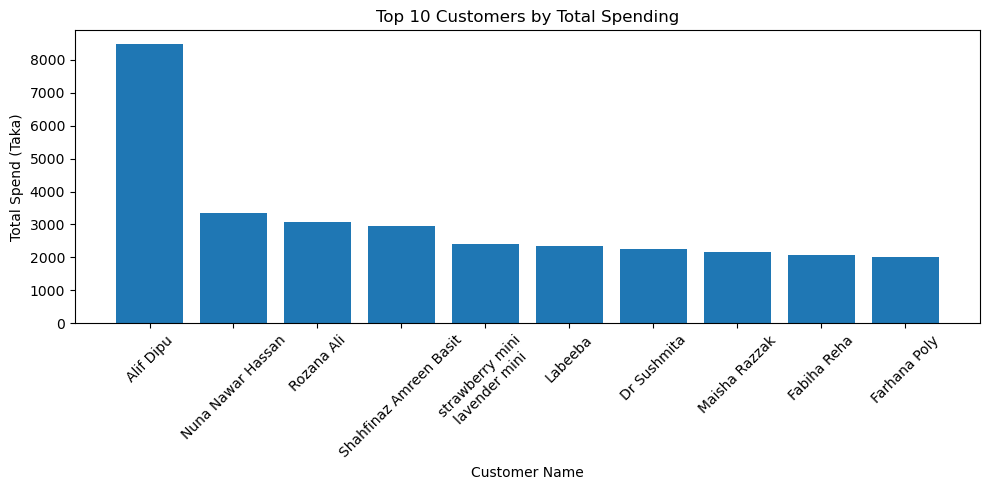

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(top_customers['name'][:10], top_customers['price'][:10])
plt.title("Top 10 Customers by Total Spending")
plt.xlabel("Customer Name")
plt.ylabel("Total Spend (Taka)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [37]:
df.to_csv("Accounts_cleaned.csv", index=False)

In [41]:
summary_data = {
    "Insight": [
        "Total Orders",
        "Total Revenue (৳)",
        "Average Order Value per Order (৳)",
        "Average Order Value per Customer (৳)",
        "Month with Highest Revenue",
        "Top-Selling Product"
    ],
    "Value": [
        len(df),
        df['price'].sum(),
        round(df['price'].sum() / len(df), 2),
        round(df['price'].sum() / df['number'].nunique(), 2),
        df.groupby('month', observed=True)['price'].sum().idxmax(),
        top_products.loc[0, 'product'].title()
    ]
}

summary_df = pd.DataFrame(summary_data)
summary_df

,Insight,Value
0,Total Orders,678
1,Total Revenue (৳),348030.0
2,Average Order Value per Order (৳),513.32
3,Average Order Value per Customer (৳),547.22
4,Month with Highest Revenue,August
5,Top-Selling Product,Lavender Mini


In [ ]:
summary_df.to_csv("summary_table.csv", index=False)